In [141]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Lung-cancer-dataset/Lung_cancer_dataset/Test/Normal cases/Normal case (349).jpg
/kaggle/input/Lung-cancer-dataset/Lung_cancer_dataset/Test/Normal cases/Normal case (367).jpg
/kaggle/input/Lung-cancer-dataset/Lung_cancer_dataset/Test/Normal cases/Normal case (281).jpg
/kaggle/input/Lung-cancer-dataset/Lung_cancer_dataset/Test/Normal cases/Normal case (348).jpg
/kaggle/input/Lung-cancer-dataset/Lung_cancer_dataset/Test/Normal cases/Normal case (366).jpg
/kaggle/input/Lung-cancer-dataset/Lung_cancer_dataset/Test/Normal cases/Normal case (333).jpg
/kaggle/input/Lung-cancer-dataset/Lung_cancer_dataset/Test/Malignant cases/Malignant case (549).jpg
/kaggle/input/Lung-cancer-dataset/Lung_cancer_dataset/Test/Malignant cases/Malignant case (547).jpg
/kaggle/input/Lung-cancer-dataset/Lung_cancer_dataset/Test/Malignant cases/Malignant case (545).jpg
/kaggle/input/Lung-cancer-dataset/Lung_cancer_dataset/Test/Malignant cases/Malignant case (548).jpg
/kaggle/input/Lung-cancer-dataset/Lu

# Importing necessary libraries


In [142]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [143]:
%config Completer.use_jedi = False
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
import cv2
import random
import os
import imageio
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

import tensorflow as tf
import tensorflow_addons as tfa
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.applications import resnet
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [144]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import keras
from keras.utils.np_utils import to_categorical
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import  Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import Xception
from keras.models import Model, Input
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras import callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [145]:
directory = r'../input/Lung-cancer-dataset/Lung_cancer_dataset/Train'

categories = ['Benign cases', 'Malignant cases', 'Normal cases']

# Observing size variations

In [146]:
size_data = {}
for i in categories:
    path = os.path.join(directory, i)
    # os.path.join() method is used to join various path components. 
    class_num = categories.index(i)
    print(class_num)
    temp_dict = {}
    for file in os.listdir(path):
        #os.listdir() method in python is used to get the list of all files and directories in the specified directory
        filepath = os.path.join(path, file)
        height, width, channels = imageio.imread(filepath).shape
        if str(height) + ' x ' + str(width) in temp_dict:
            temp_dict[str(height) + ' x ' + str(width)] += 1 
        else:
            temp_dict[str(height) + ' x ' + str(width)] = 1
    
    size_data[i] = temp_dict
    print(categories[class_num], ": ",end="")
    print(size_data[i])

0
Benign cases : {'512 x 512': 112}
1
Malignant cases : {'512 x 512': 495, '512 x 623': 31, '512 x 801': 28, '404 x 511': 1}
2
Normal cases : {'512 x 512': 409, '331 x 506': 1}


# Visualizing the 3 catogories of CT scans

Benign cases


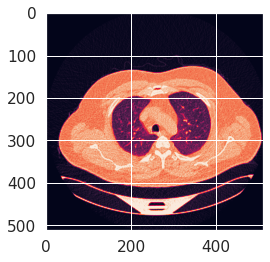

Malignant cases


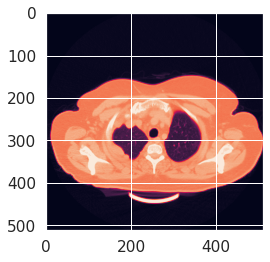

Normal cases


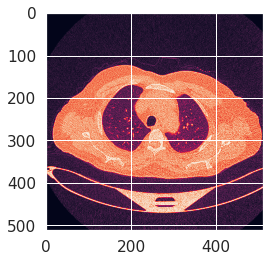

In [147]:
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(i)
        img = cv2.imread(filepath, 0)
        plt.imshow(img)
        plt.show()
        break

# Image Preprocessing and Testing


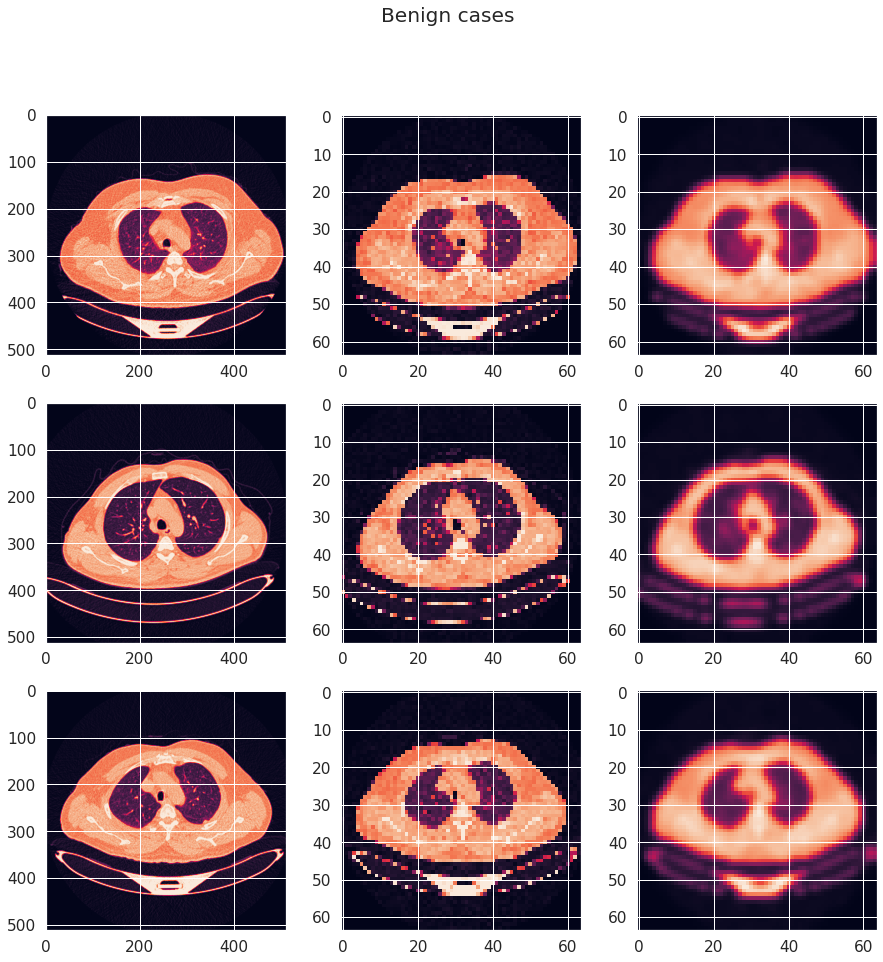

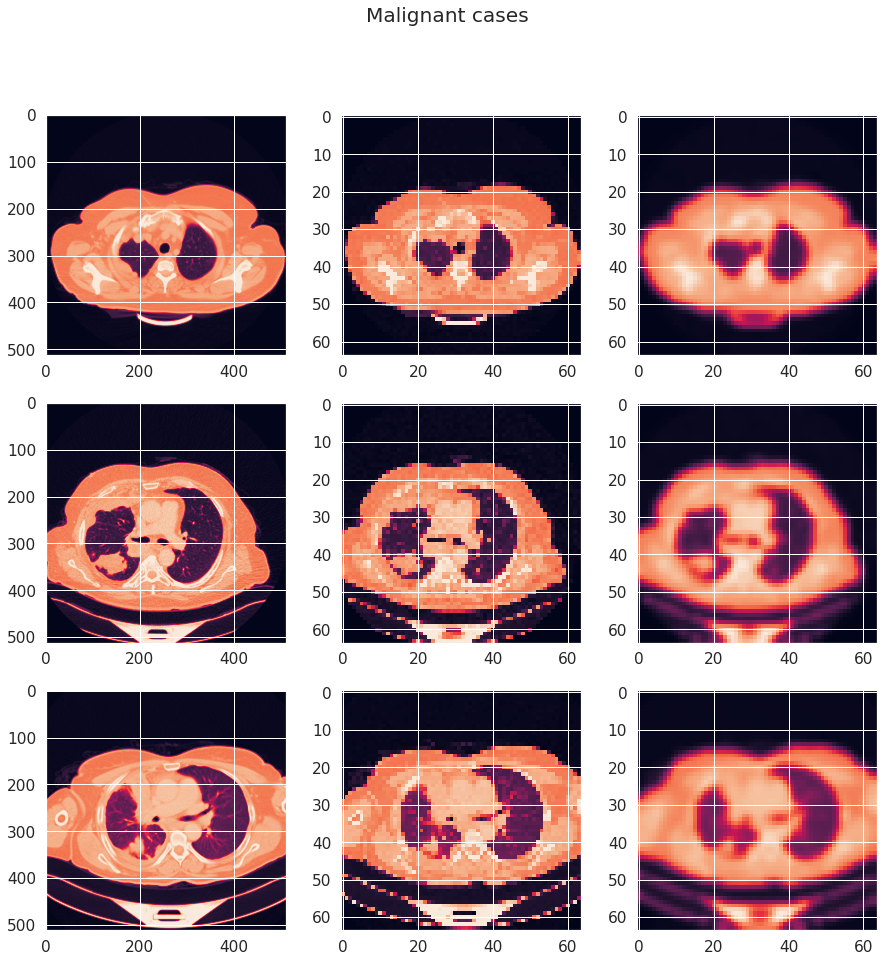

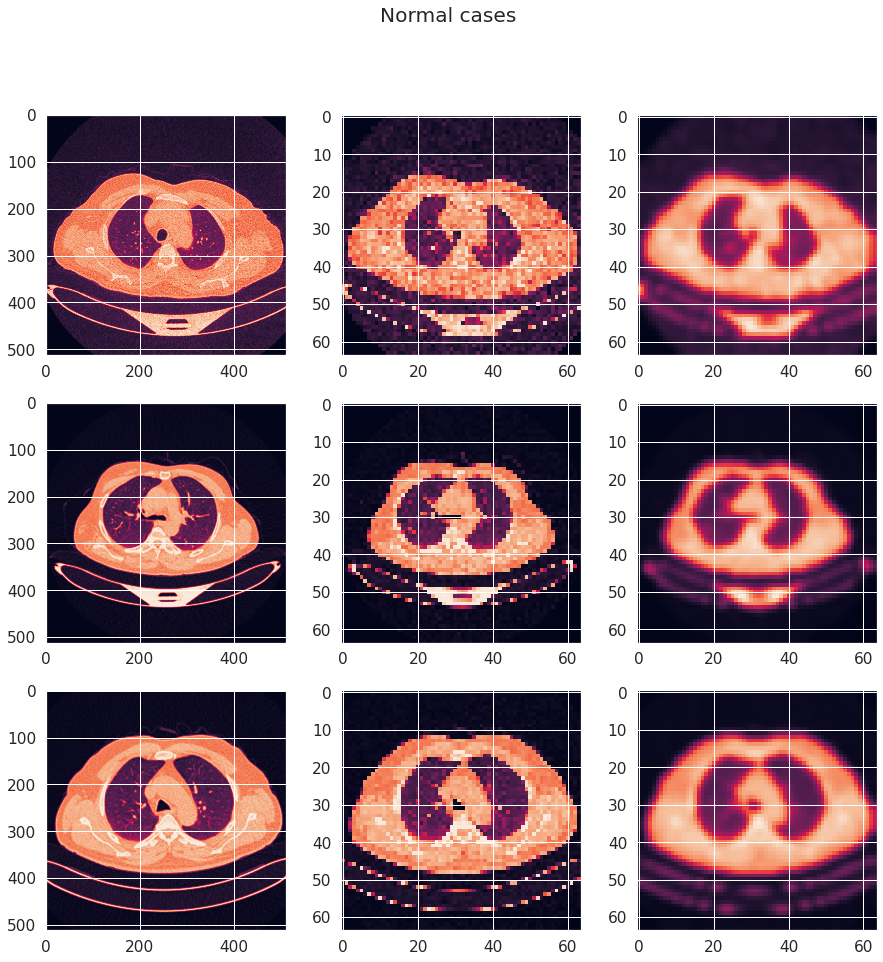

In [148]:
img_size = 64
for i in categories:
    cnt, samples = 0, 3
    fig, ax = plt.subplots(samples, 3, figsize=(15, 15))
    fig.suptitle(i)
    
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for curr_cnt, file in enumerate(os.listdir(path)):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        
        img0 = cv2.resize(img, (img_size, img_size))
        
        img1 = cv2.GaussianBlur(img0, (5, 5), 0)
        
        ax[cnt, 0].imshow(img)
        ax[cnt, 1].imshow(img0)
        ax[cnt, 2].imshow(img1)
        cnt += 1
        if cnt == samples:
            break
        
plt.show()

# Visualizing a malignant tumour

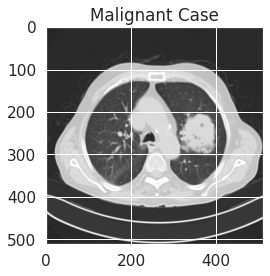

In [149]:
img = cv2.imread(r'../input/Lung-cancer-dataset/Lung_cancer_dataset/Train/Malignant cases/Malignant case (10).jpg')
plt.title("Malignant Case")
plt.imshow(img)

# Initializing image width and height

In [150]:
img_width = 64
img_height = 64

# Split training and validation set using ImageDataGenerator

In [151]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.30)


In [152]:
train_data_generator = datagen.flow_from_directory(directory=r'../input/Lung-cancer-dataset/Lung_cancer_dataset/Train', target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 16, subset = "training", shuffle="True")


Found 755 images belonging to 3 classes.


In [153]:
validation_data_generator = datagen.flow_from_directory(directory=r'../input/Lung-cancer-dataset/Lung_cancer_dataset/Train', target_size = (img_width, img_height),color_mode="grayscale", class_mode="categorical", batch_size = 16,subset = "validation")


Found 322 images belonging to 3 classes.


# Image preprocessing and testing


In [154]:
train_data_generator.next()[1]


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [155]:
data = []    #training
img_size = 64

for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        # preprocess here
        img = cv2.resize(img, (img_size, img_size))
        data.append([img, class_num])
        
random.shuffle(data)

X, y = [], []
for feature, label in data:
    X.append(feature)
    y.append(label)
    
    
print('X length:', len(X))
print('y counts:', Counter(y))

# normalize
X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X / 255.0
y = np.array(y)

X length: 1077
y counts: Counter({1: 555, 2: 410, 0: 112})


In [156]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=10, stratify=y)

print(len(X_train), X_train.shape)
print(len(X_valid), X_valid.shape)

807 (807, 64, 64, 1)
270 (270, 64, 64, 1)


# Observing imbalance in different classes of dataset

In [157]:
print(Counter(y_train), Counter(y_valid))

Counter({1: 416, 2: 307, 0: 84}) Counter({1: 139, 2: 103, 0: 28})


In [158]:
print(len(X_train), X_train.shape)
X_train = X_train.reshape(X_train.shape[0], img_size*img_size*1)
print(len(X_train), X_train.shape)

807 (807, 64, 64, 1)
807 (807, 4096)


# MODEL 2- Applying SMOTE


# Applying SMOTE to oversample the data

In [159]:

print('Before SMOTE:', Counter(y_train))
smote = SMOTE()
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)
print('After SMOTE:', Counter(y_train_sampled))

X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_train_sampled = X_train_sampled.reshape(X_train_sampled.shape[0], img_size, img_size, 1)
print(len(X_train), X_train.shape)
print(len(X_train_sampled), X_train_sampled.shape)


Before SMOTE: Counter({1: 416, 2: 307, 0: 84})
After SMOTE: Counter({0: 416, 1: 416, 2: 416})
807 (807, 64, 64, 1)
1248 (1248, 64, 64, 1)


# Model building with SMOTE data


In [160]:
model2 = Sequential()
model2.add(Dropout(0.3, input_shape=X_train.shape[1:]))

model2.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(16))
model2.add(Dense(3, activation='softmax'))
model2.summary()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_10 (Dropout)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
activation_4 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 12544)            

# Compiling Model2

In [161]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Running 50 epochs for model2

In [162]:
history = model2.fit(X_train_sampled, y_train_sampled, batch_size=1, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1248/1248 [==============================] - 10s 7ms/step - loss: 0.9978 - accuracy: 0.5048 - val_loss: 0.7625 - val_accuracy: 0.6815
Epoch 2/10
1248/1248 [==============================] - 9s 7ms/step - loss: 0.5657 - accuracy: 0.7700 - val_loss: 0.3026 - val_accuracy: 0.9000
Epoch 3/10
1248/1248 [==============================] - 9s 7ms/step - loss: 0.2399 - accuracy: 0.9119 - val_loss: 0.2224 - val_accuracy: 0.9333
Epoch 4/10
1248/1248 [==============================] - 10s 8ms/step - loss: 0.1159 - accuracy: 0.9543 - val_loss: 0.1213 - val_accuracy: 0.9630
Epoch 5/10
1248/1248 [==============================] - 9s 7ms/step - loss: 0.0881 - accuracy: 0.9663 - val_loss: 0.1097 - val_accuracy: 0.9667
Epoch 6/10
1248/1248 [==============================] - 9s 7ms/step - loss: 0.0769 - accuracy: 0.9736 - val_loss: 0.1059 - val_accuracy: 0.9630
Epoch 7/10
1248/1248 [==============================] - 10s 8ms/step - loss: 0.0870 - accuracy: 0.9736 - val_loss: 0.0862 - val_accura

# Model 2 Accuracy

In [163]:
print("Calculating accuracy for Model2")
scores=model2.evaluate(X_valid,y_valid)
print(f"Test accuracy:{scores[1]*100}")

Calculating accuracy for Model2
9/9 [==============================] - 0s 22ms/step - loss: 0.0766 - accuracy: 0.9741
Test accuracy:97.40740656852722


# Preparing data for testing

In [164]:
datagen_test = ImageDataGenerator(rescale = 1/255.0)
test_data_generator = datagen.flow_from_directory(directory=r'../input/Lung-cancer-dataset/Lung_cancer_dataset/Test', target_size = (img_size, img_size), color_mode="grayscale", class_mode="categorical", batch_size = 10, subset = "training")


Found 16 images belonging to 3 classes.


In [165]:
test_data_generator.next()[1]


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

# Plotting accuracy for Model2

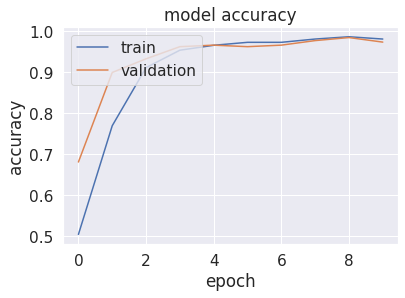

In [166]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plotting Loss for Model2

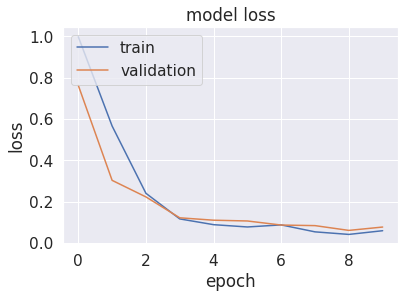

In [167]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# MODEL 1- Without applying SMOTE

In [168]:
X_train_sampled, y_train_sampled = X_train, y_train
X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_train_sampled = X_train_sampled.reshape(X_train_sampled.shape[0], img_size, img_size, 1)

print(len(X_train), X_train.shape)
print(len(X_train_sampled), X_train_sampled.shape)

807 (807, 64, 64, 1)
807 (807, 64, 64, 1)


# Basic CNN model for original data


In [169]:
model1 = Sequential()
model1.add(Dropout(0.3, input_shape=X_train.shape[1:]))
model1.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model1.add(MaxPool2D(2,2))
model1.add(Conv2D(64,(3,3), activation="relu"))
model1.add(MaxPool2D(3,3))
model1.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model1.add(MaxPool2D(2,2))
model1.add(Flatten())
model1.add(Dense(32,activation="relu"))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(32,activation="relu"))
model1.add(Dense(3, activation="softmax"))


# Compiling Model1

In [170]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Running 50 epochs on Model1

In [171]:
history = model1.fit(X_train_sampled, y_train_sampled, batch_size=1, epochs=10, validation_data=(X_valid, y_valid))


Epoch 1/10
807/807 [==============================] - 6s 7ms/step - loss: 0.9814 - accuracy: 0.4969 - val_loss: 0.9457 - val_accuracy: 0.5148
Epoch 2/10
807/807 [==============================] - 5s 7ms/step - loss: 0.8160 - accuracy: 0.6221 - val_loss: 0.8021 - val_accuracy: 0.7037
Epoch 3/10
807/807 [==============================] - 6s 7ms/step - loss: 0.6716 - accuracy: 0.7373 - val_loss: 0.6609 - val_accuracy: 0.7333
Epoch 4/10
807/807 [==============================] - 6s 7ms/step - loss: 0.5464 - accuracy: 0.7918 - val_loss: 0.5835 - val_accuracy: 0.7889
Epoch 5/10
807/807 [==============================] - 6s 7ms/step - loss: 0.5005 - accuracy: 0.8067 - val_loss: 0.5912 - val_accuracy: 0.8000
Epoch 6/10
807/807 [==============================] - 6s 7ms/step - loss: 0.4324 - accuracy: 0.8278 - val_loss: 0.5558 - val_accuracy: 0.7630
Epoch 7/10
807/807 [==============================] - 6s 7ms/step - loss: 0.4009 - accuracy: 0.8290 - val_loss: 0.5669 - val_accuracy: 0.7593
Epoch 

# Preparing data for testing

In [172]:
datagen_test = ImageDataGenerator(rescale = 1/255.0)
test_data_generator = datagen.flow_from_directory(directory=r'../input/Lung-cancer-dataset/Lung_cancer_dataset/Test', target_size = (img_size, img_size), color_mode="grayscale", class_mode="categorical", batch_size = 10, subset = "training")


Found 16 images belonging to 3 classes.


In [173]:
test_data_generator.next()[1]


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

# Plotting accuracy for Model1

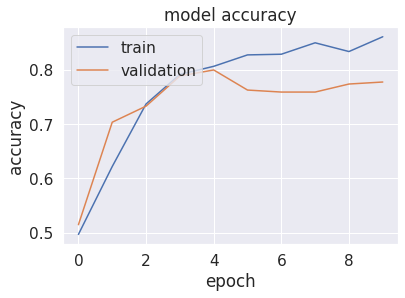

In [174]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plotting loss for Model1

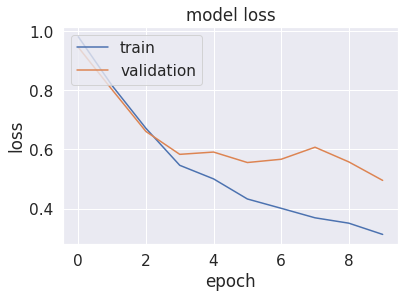

In [175]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# MODEL3- Class weighted approach

# CNN model 

In [176]:
model3 = Sequential()
model3.add(Dropout(0.3, input_shape=X_train.shape[1:]))

model3.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(16))
model3.add(Dense(3, activation='softmax'))

model3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_12 (Dropout)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
activation_5 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 12544)           

# Compiling Model3

In [177]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Assigning weights for different classes
 class_weight = 'balanced' to automatically adjust weights inversely proportional to class frequencies in the input data

In [178]:
new_weights = {
    0: X_train.shape[0]/(3*Counter(y_train)[0]),
    1: X_train.shape[0]/(3*Counter(y_train)[1]),
    2: X_train.shape[0]/(3*Counter(y_train)[2]),
}

# new_weights[0] = 0.5
# new_weights[1] = 20

new_weights

{0: 3.2023809523809526, 1: 0.6466346153846154, 2: 0.8762214983713354}

# Running 50 epochs for Model3

In [179]:
history = model3.fit(X_train, y_train, batch_size=8, epochs=10, validation_data=(X_valid, y_valid), class_weight=new_weights)

Epoch 1/10
101/101 [==============================] - 3s 27ms/step - loss: 1.1143 - accuracy: 0.2887 - val_loss: 1.1101 - val_accuracy: 0.2037
Epoch 2/10
101/101 [==============================] - 3s 26ms/step - loss: 0.9427 - accuracy: 0.5304 - val_loss: 0.8313 - val_accuracy: 0.6407
Epoch 3/10
101/101 [==============================] - 3s 25ms/step - loss: 0.7237 - accuracy: 0.6629 - val_loss: 0.5614 - val_accuracy: 0.8296
Epoch 4/10
101/101 [==============================] - 3s 25ms/step - loss: 0.4789 - accuracy: 0.8240 - val_loss: 0.3335 - val_accuracy: 0.9000
Epoch 5/10
101/101 [==============================] - 3s 25ms/step - loss: 0.3308 - accuracy: 0.8773 - val_loss: 0.2547 - val_accuracy: 0.9037
Epoch 6/10
101/101 [==============================] - 3s 25ms/step - loss: 0.2598 - accuracy: 0.9157 - val_loss: 0.2290 - val_accuracy: 0.9407
Epoch 7/10
101/101 [==============================] - 3s 26ms/step - loss: 0.2169 - accuracy: 0.9257 - val_loss: 0.2085 - val_accuracy: 0.9630

# Preparing data for testing

In [180]:
datagen_test = ImageDataGenerator(rescale = 1/255.0)
test_data_generator = datagen.flow_from_directory(directory=r'../input/Lung-cancer-dataset/Lung_cancer_dataset/Test', target_size = (img_size, img_size), color_mode="grayscale", class_mode="categorical", batch_size = 10, subset = "training")


Found 16 images belonging to 3 classes.


In [181]:
test_data_generator.next()[1]


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

# Plotting Accuracy for Model3

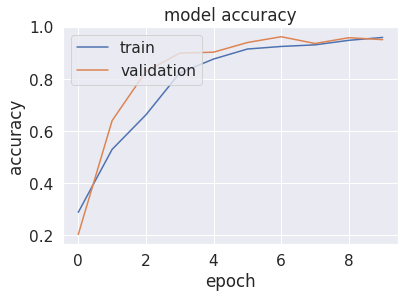

In [182]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plotting Loss for Model3

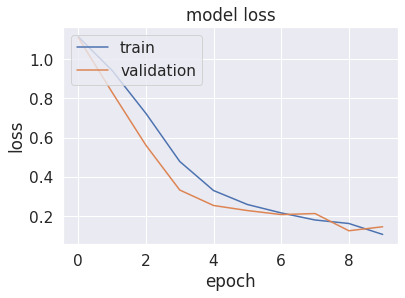

In [183]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Testing the models on new set of input data

In [184]:
x,y = train_data_generator.next()
a,b = test_data_generator.next()

pred_array_model1=[]
pred_array_model2=[]
pred_array_model3=[]

max_index_arr = []
for i in range(5):
    img = x[i]
    img = img.reshape(-1,64,64,1)
    img1 = a[i]
    img1 = img1.reshape(-1,64,64,1)
    pred_val_model1 = model1.predict(img)
    pred_val_model2 = model2.predict(img)
    pred_val_model3 = model3.predict(img)

    max_idx_model1 = np.argmax(pred_val_model1)
    pred_array_model1.append(max_idx_model1)
    
    max_idx_model2 = np.argmax(pred_val_model2)
    pred_array_model2.append(max_idx_model2)
    
    max_idx_model3 = np.argmax(pred_val_model3)
    pred_array_model3.append(max_idx_model3)

# Making the Output meaningful using named classes


In [185]:

cell_dict = {0:"Benign", 1:"Malignant", 2:"Normal"}
predictions1 = {}
actual_val1 = {}
predictions2 = {}
actual_val2 = {}
predictions3 = {}
actual_val3 = {}

k=0
for arr in y[:5]:
    actual_val1[k] = cell_dict[np.argmax(arr)]
    k+=1
k=0
for arr in y[:5]:
    actual_val2[k] = cell_dict[np.argmax(arr)]
    k+=1

k=0
for arr in y[:5]:
    actual_val3[k] = cell_dict[np.argmax(arr)]
    k+=1

k=0
for pred in pred_array_model1:
    predictions1[k] = cell_dict[pred]
    k+=1
print("Predictions for model1")  
print("ACTUAL:", actual_val1)
print("PREDICTIONS:", predictions1)

k=0
for pred in pred_array_model2:
    predictions2[k] = cell_dict[pred]
    k+=1
print("Predictions for model2")  
print("ACTUAL:", actual_val2)
print("PREDICTIONS:", predictions2)

k=0
for pred in pred_array_model3:
    predictions3[k] = cell_dict[pred]
    k+=1
print("Predictions for model3")  
print("ACTUAL:", actual_val3)
print("PREDICTIONS:", predictions3)

Predictions for model1
ACTUAL: {0: 'Normal', 1: 'Normal', 2: 'Normal', 3: 'Malignant', 4: 'Benign'}
PREDICTIONS: {0: 'Malignant', 1: 'Normal', 2: 'Normal', 3: 'Malignant', 4: 'Malignant'}
Predictions for model2
ACTUAL: {0: 'Normal', 1: 'Normal', 2: 'Normal', 3: 'Malignant', 4: 'Benign'}
PREDICTIONS: {0: 'Normal', 1: 'Normal', 2: 'Normal', 3: 'Malignant', 4: 'Benign'}
Predictions for model3
ACTUAL: {0: 'Normal', 1: 'Normal', 2: 'Normal', 3: 'Malignant', 4: 'Benign'}
PREDICTIONS: {0: 'Normal', 1: 'Normal', 2: 'Normal', 3: 'Malignant', 4: 'Benign'}


# Displaying actual and predicted outputs along with input images(CT scans)

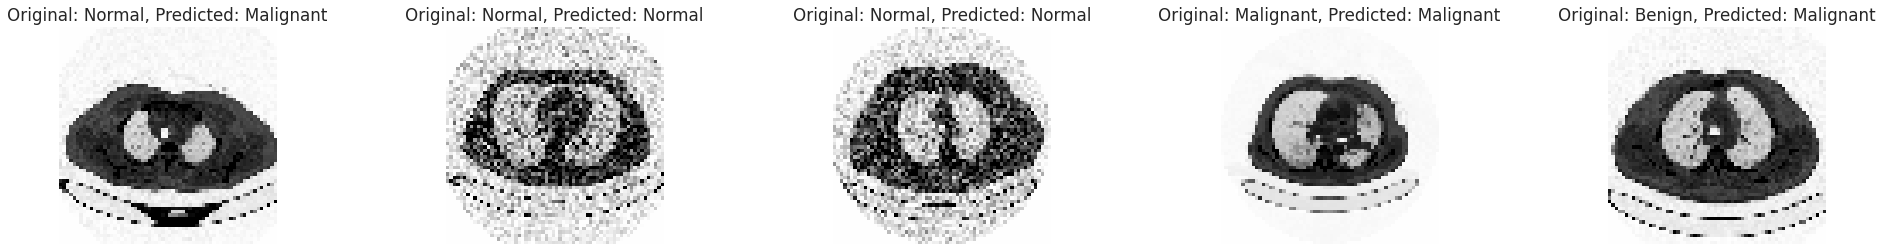

In [186]:
plt.figure(figsize = (20,20))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(x[i], cmap="binary")
    plt.title('Original: {}, Predicted: {}'.format(actual_val1[i], predictions1[i]))
    plt.axis('Off')

 
plt.subplots_adjust(left=1.5, right=2.8, top=1)
plt.show()

In [187]:
import seaborn as sn

# Classification report and Confusion matrix for Model1

9/9 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

           0       0.54      0.50      0.52        28
           1       0.79      0.97      0.87       139
           2       0.84      0.59      0.69       103

    accuracy                           0.78       270
   macro avg       0.72      0.69      0.69       270
weighted avg       0.78      0.78      0.77       270

[[ 14   6   8]
 [  0 135   4]
 [ 12  30  61]]


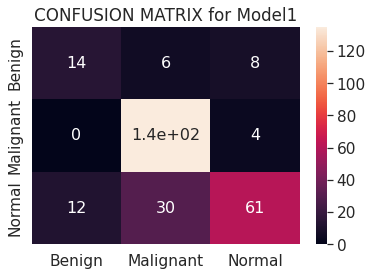

In [188]:
y_pred = model1.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_valid, y_pred_bool))
x_axis_labels = ['Benign', 'Malignant', 'Normal'] # labels for x-axis
y_axis_labels = ['Benign', 'Malignant', 'Normal'] # labels for y-axis

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))
array= confusion_matrix(y_true=y_valid, y_pred=y_pred_bool)
df_cm = pd.DataFrame(array, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
#sn.set_xlabel='Predicted'
#sn.set_ylabel='Actual'

sn.heatmap(df_cm,xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True, annot_kws={"size": 16}) # font size
plt.title('CONFUSION MATRIX for Model1')
plt.show() 




# # Classification report and Confusion matrix for Model2

9/9 [==============================] - 0s 21ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.97      1.00      0.99       139
           2       0.99      0.94      0.97       103

    accuracy                           0.97       270
   macro avg       0.96      0.97      0.97       270
weighted avg       0.97      0.97      0.97       270

[[ 27   0   1]
 [  0 139   0]
 [  2   4  97]]


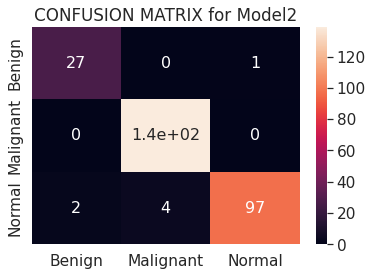

In [189]:
y_pred = model2.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_valid, y_pred_bool))
x_axis_labels = ['Benign', 'Malignant', 'Normal'] # labels for x-axis
y_axis_labels = ['Benign', 'Malignant', 'Normal'] # labels for y-axis

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))
array= confusion_matrix(y_true=y_valid, y_pred=y_pred_bool)
df_cm = pd.DataFrame(array, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
#sn.set_xlabel='Predicted'
#sn.set_ylabel='Actual'

sn.heatmap(df_cm,xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True, annot_kws={"size": 16}) # font size
plt.title('CONFUSION MATRIX for Model2')
plt.show()



# Classification report and Confusion matrix for Model3

9/9 [==============================] - 0s 21ms/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        28
           1       0.96      0.99      0.98       139
           2       1.00      0.88      0.94       103

    accuracy                           0.95       270
   macro avg       0.92      0.96      0.93       270
weighted avg       0.96      0.95      0.95       270

[[ 28   0   0]
 [  1 138   0]
 [  6   6  91]]


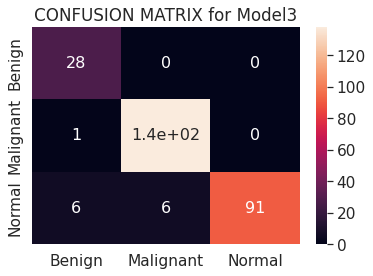

In [190]:
y_pred = model3.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_valid, y_pred_bool))
x_axis_labels = ['Benign', 'Malignant', 'Normal'] # labels for x-axis
y_axis_labels = ['Benign', 'Malignant', 'Normal'] # labels for y-axis

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))
array= confusion_matrix(y_true=y_valid, y_pred=y_pred_bool)
df_cm = pd.DataFrame(array, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
#sn.set_xlabel='Predicted'
#sn.set_ylabel='Actual'

sn.heatmap(df_cm,xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True, annot_kws={"size": 16}) # font size
plt.title('CONFUSION MATRIX for Model3')
plt.show() 




# Accuracies for 3 models

In [195]:
print("Calculating model accuracy")
scores1=model1.evaluate(X_valid,y_valid)
print(f"Test accuracy:{scores1[1]*100}")

Calculating model accuracy
9/9 [==============================] - 0s 14ms/step - loss: 0.4953 - accuracy: 0.7778
Test accuracy:77.77777910232544


In [196]:
print("Calculating model accuracy")
scores2=model2.evaluate(X_valid,y_valid)
print(f"Test accuracy:{scores2[1]*100}")

Calculating model accuracy
9/9 [==============================] - 0s 22ms/step - loss: 0.0766 - accuracy: 0.9741
Test accuracy:97.40740656852722


In [197]:
print("Calculating model accuracy")
scores3=model3.evaluate(X_valid,y_valid)
print(f"Test accuracy:{scores3[1]*100}")

Calculating model accuracy
9/9 [==============================] - 0s 21ms/step - loss: 0.1464 - accuracy: 0.9519
Test accuracy:95.18518447875977


# Accuries of 3 models

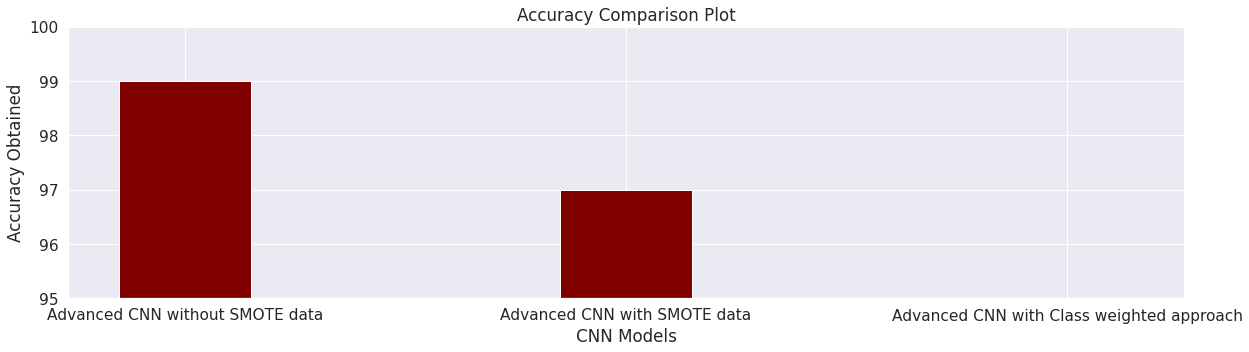

In [194]:
import numpy as np
import matplotlib.pyplot as plt
  
  
# creating the dataset
data = {'Advanced CNN without SMOTE data':99, 'Advanced CNN with SMOTE data':97, 'Advanced CNN with Class weighted approach':95}
CNN_models = list(data.keys())
Accuracy = list(data.values())
  
fig = plt.figure(figsize = (20, 5))
plt.ylim([95, 100])

# creating the bar plot
plt.bar(CNN_models, Accuracy, color ='maroon',width = 0.3)

plt.xlabel("CNN Models")
plt.ylabel("Accuracy Obtained")
plt.title("Accuracy Comparison Plot")
plt.savefig('accuracy_bar.png',dpi=400)
plt.show()